# Data Science Project: Predicting Usage of a Video Game Research Server

**_______________________________________________________________________________________________________________________________**

## Predicting Which Players Are Most Likely to Subscribe to Game-Related Newsletters

### Introduction

At UBC, a research group led by Frank Wood collected data on people playing video games, specifically Minecraft. Minecraft is a popular game played by millions of people worldwide. Many players often become hooked on Minecraft and stay hooked through newsletters. Newsletters are emails that are sent to players to share news about updates and special offers, encouraging them to buy items and continue playing. However, subscribing to these newsletters is optional. 

The question we want to answer is: **Can a player's age predict whether they will sibscribe to Minecraft emails and newsletters in the `players.csv` dataset?**

The data  collected includes: 
- Players' experience (`experience`)
- Whether they subscribed to receive game-related newsletters (`subscribe`)
- Players' email (`hashedEmail`)
- The number of hours players play Minecraft (`played_hours`)
- The players' name (`name`)
- The players' gender (`gender`)
- The players' age (`Age`)

Note that some variables contain missing information for certain players (e.g., N/A). These missing values must be addressed and removed when cleaning the data. 

### Methods & Results

In [2]:
#Run cell
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players_data <- read_csv("Data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [14]:
players_data_clean <- players_data |>
    select(subscribe, Age) |>
    mutate(subscribe = as_factor(subscribe), Age = as_factor(Age)) |>
    drop_na()
players_data_clean

subscribe,Age
<fct>,<fct>
TRUE,9
TRUE,17
FALSE,17
⋮,⋮
FALSE,22
FALSE,17
FALSE,17


Warning message in geom_bar(count = "stat"):
“Ignoring unknown parameters: `count`”


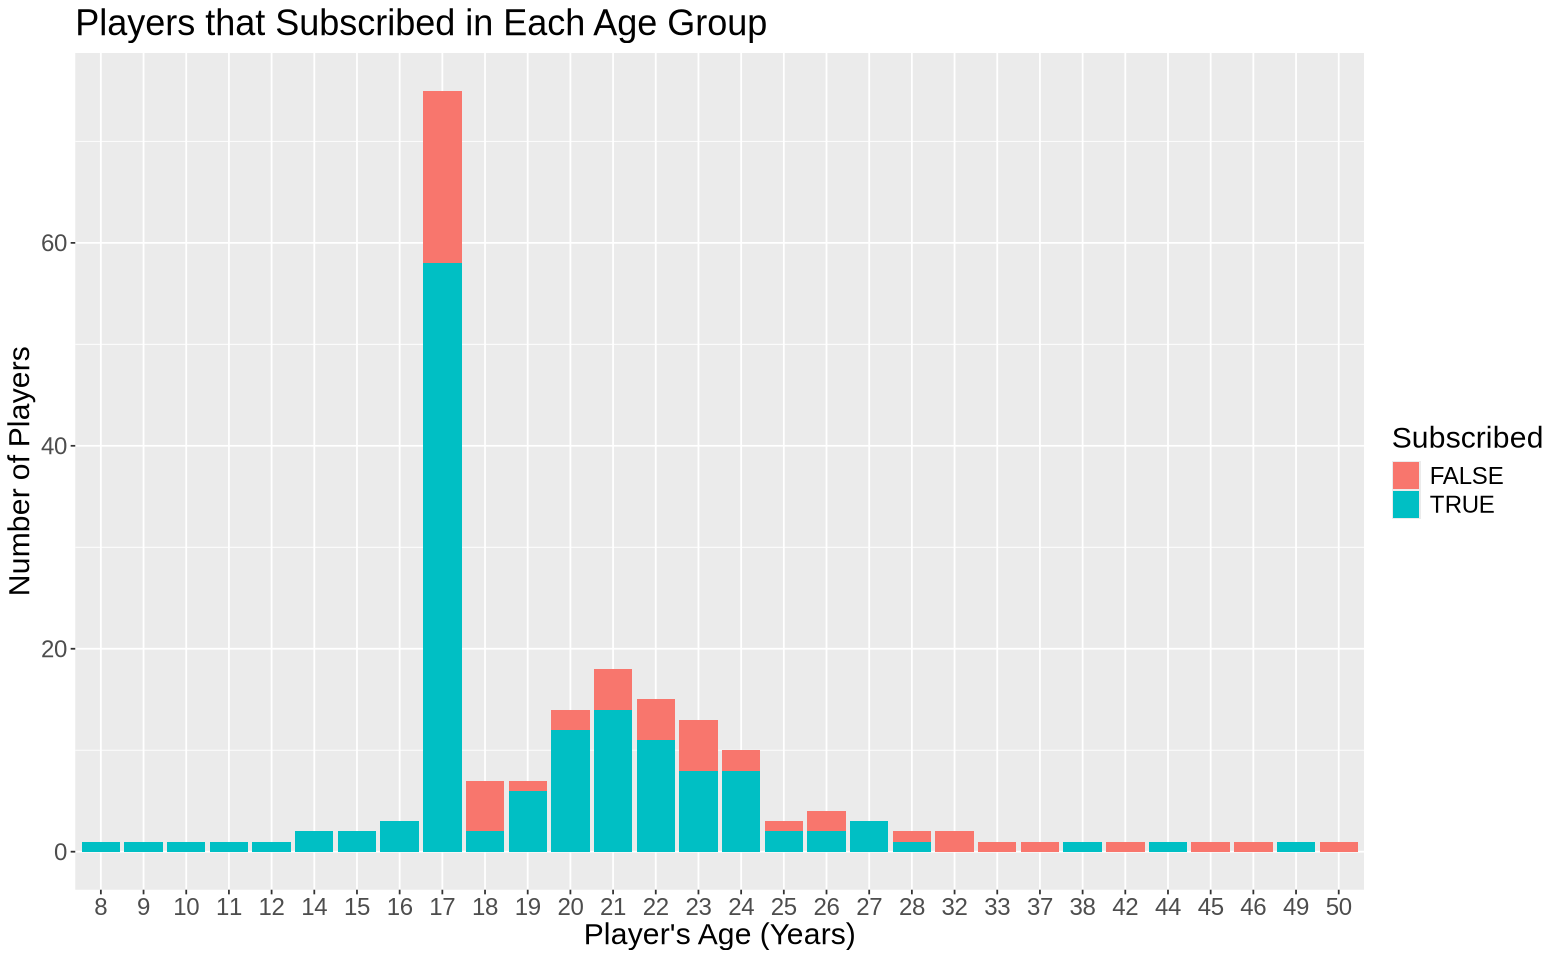

In [21]:
options(repr.plot.width=13, repr.plot.height=8)

player_data_clean_plot <- players_data_clean |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_bar(count = "stat") +
    labs(x = "Player's Age (Years)", y = "Number of Players", fill = "Subscribed") +
    ggtitle("Players that Subscribed in Each Age Group") +
    theme(text = element_text(size = 18))
player_data_clean_plot